In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [17]:
x = np.array([50, 51, 52, 53, 54]).reshape(-1,1)
y = np.array([20, 40, 50, 70, 80]).reshape(-1,1)
x, y


(array([[50],
        [51],
        [52],
        [53],
        [54]]),
 array([[20],
        [40],
        [50],
        [70],
        [80]]))

In [19]:
model=LinearRegression()
model.fit(x,y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)


intercept: [-728.]
slope: [[15.]]


In [21]:
y_predict = model.predict([[51.5]])
y_predict

array([[44.5]])

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
df = pd.read_csv("C:\\Kiwwy\\Study\\Year1\\Stat\\LAB03\\advertising.csv")


MAE = 1604.7420000000002
MSE = 3781908.214000001


In [24]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [25]:
x_TV=df.TV.values.reshape(-1,1)
y=df.Sales.values.reshape(-1,1)

y_predict1=model.predict(x_TV)
print('MAE =', mean_absolute_error(y,y_predict1))
print('MSE =', mean_squared_error(y,y_predict1))

MAE = 1604.7420000000002
MSE = 3781908.214000001


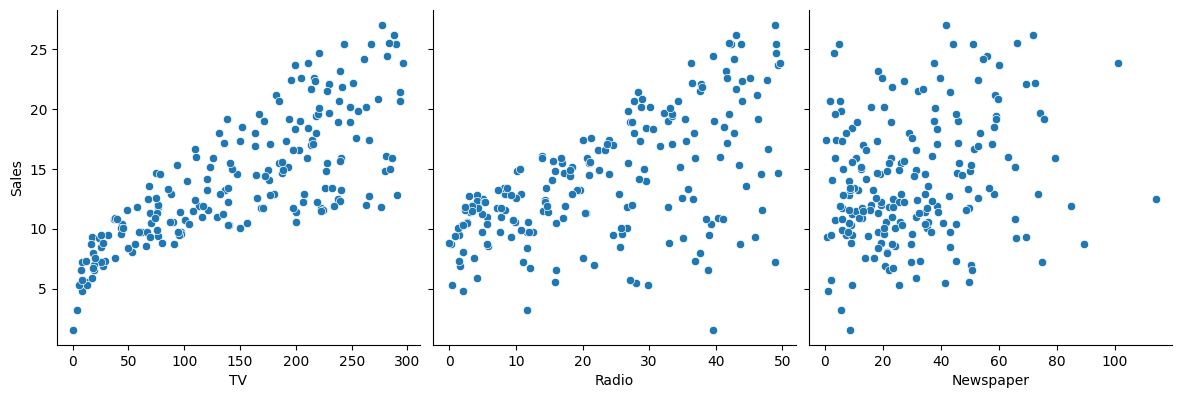

In [23]:
import seaborn as sns
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=4)

In [26]:
x_Radio=df.Radio.values.reshape(-1,1)
x_News=df.Newspaper.values.reshape(-1,1)

In [31]:
model.fit(x_Radio,y)
print(model.score(x_Radio,y))

model.fit(x_News,y)
print(model.score(x_News,y))

0.33203245544529525
0.05212044544430516


In [33]:
x_TVRadio=df[['TV','Radio']]
x_TVNews=df[['TV','Newspaper']]


In [43]:
x_TV=df.TV.values.reshape(-1,1)
model.fit(x_TV, y)
print(model.score(x_TV, y))

0.611875050850071


In [34]:
model.fit(x_TVNews,y)
print(model.score(x_TVNews,y))


0.6458354938293271


In [45]:
X3=df[['TV','Radio','Newspaper']]
model.fit(X3,y)
print(model.score(X3,y))

0.8972106381789522


In [46]:
print(model.coef_)
print(model.intercept_)

[[ 0.04576465  0.18853002 -0.00103749]]
[2.93888937]


In [47]:
x_input=[[300,0,0],[0,300,0],[0,0,300],[100,200,200],[100,200,0]]
model.predict(x_input)


C:\Users\kiwwy\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16.66828301],
       [59.49789444],
       [ 2.62764146],
       [45.01385869],
       [45.2213573 ]])

In [48]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [49]:
x = np.array([0, 1, 2, -1, -2]).reshape(-1,1)
y = np.array([1, 6, 17, 2, 9]).reshape(-1,1)

In [50]:
poly_features=PolynomialFeatures(degree=2)
x_poly=poly_features.fit_transform(x)
model=LinearRegression()
model.fit(x_poly,y)

LinearRegression()

In [51]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

# 1 + 2x 3x^2

intercept: [1.]
slope: [[0. 2. 3.]]


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [54]:
df= pd.read_csv('C:\Kiwwy\Study\Year1\Stat\LAB03\salary.csv')


<>:1: SyntaxWarning: invalid escape sequence '\K'
<>:1: SyntaxWarning: invalid escape sequence '\K'
C:\Users\kiwwy\AppData\Local\Temp\ipykernel_5212\4197396941.py:1: SyntaxWarning: invalid escape sequence '\K'
  df= pd.read_csv('C:\Kiwwy\Study\Year1\Stat\LAB03\salary.csv')


In [60]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [57]:
x = df.iloc[:,1:2].values
y = df.iloc[:,2].values

In [62]:
x, y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

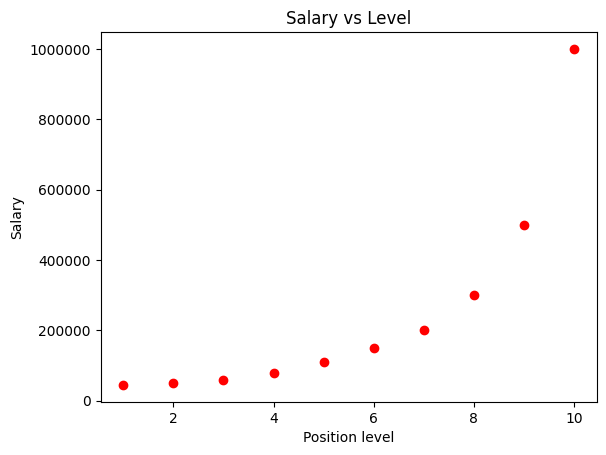

In [61]:
plt.scatter(x,y, color='red')
plt.ticklabel_format(style='plain')
plt.title('Salary vs Level')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [73]:
degree=['Degree1', 'Degree2', 'Degree3', 'Degree4']
Predict=pd.DataFrame(index=degree).T
Rscore = []

for k in range(1, 5):
    poly_features=PolynomialFeatures(degree=k)
    x_poly=poly_features.fit_transform(x)
    model=LinearRegression()
    model.fit(x_poly,y)
    p1=model.predict(x_poly)
    if(k==1):
        Predict.Degree1=p1
    elif(k==2):
        Predict.Degree2=p1
    elif(k==3):
        Predict.Degree3=p1
    else:
        Predict.Degree4=p1
    Rscore.append(model.score(x_poly,y))

Predict

,Degree1,Degree2,Degree3,Degree4
0,-114454.545455,118727.272727,14902.097902,53356.643357
1,-33575.757576,44151.515152,78759.906760,31759.906760
2,47303.030303,8439.393939,94960.372960,58642.191142
3,128181.818182,11590.909091,88223.776224,94632.867133
4,209060.606061,53606.060606,83270.396270,121724.941725
5,289939.393939,134484.848485,104820.512821,143275.058275
6,370818.181818,254227.272727,177594.405594,184003.496504
7,451696.969697,412833.333333,326312.354312,289994.172494
8,532575.757576,610303.030303,575694.638695,528694.638695
9,613454.545455,846636.363636,950461.538462,988916.083916


In [74]:
Rscore

[0.6690412331929895,
 0.9162082221443942,
 0.9812097727913366,
 0.9973922891706614]

In [75]:
print(model.intercept_, model.coef_)


184166.66666719783 [      0.         -211002.33100292   94765.44289063  -15463.28671331
     890.15151515]


In [76]:
x_poly = PolynomialFeatures(degree=4)
model.predict(x_poly.fit_transform([[6.5]]))

array([158862.45265155])

(array([[4],
        [5],
        [6]], dtype=int64),
 array([7, 8, 9], dtype=int64))